<a href="https://colab.research.google.com/github/VandhanaV/Sparks-internship/blob/master/Task4_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus

In [ ]:
#LOAD AND VIEW DATA

path = "https://raw.githubusercontent.com/VandhanaV/Sparks-internship/master/task4_Iris.csv"
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


OBSERVATIONS - NO NULL VALUES

In [ ]:
#SPLIT DATA FOR TRAIN AND TEST SET

X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6,test_size=0.2)

In [ ]:
#BUILD MODEL

dt_model =tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy')
dt_model.fit(X_train,y_train)
dt_score_train=dt_model.score(X_train,y_train)
dt_score_test=dt_model.score(X_test,y_test)
print("Train score :-",dt_score_train)
print("Test score :-",dt_score_test)

Train score :- 0.975
Test score :- 0.9666666666666667


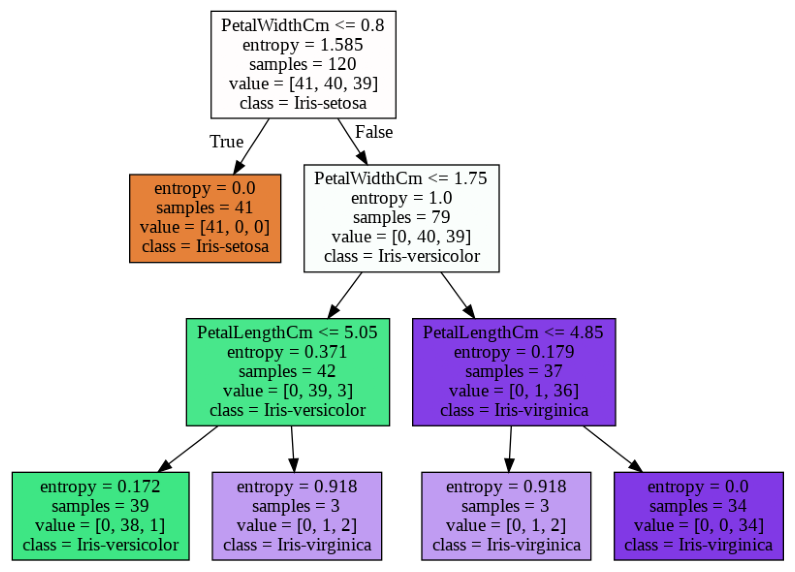

In [ ]:
#VISUALIZE DECISION TREE

dot_data=tree.export_graphviz(dt_model, out_file=None, feature_names=X.columns, 
filled = True, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
graph_big=pydotplus.graph_from_dot_data(dot_data)

img_path = '/file.png'
graph_big.write_png(img_path)
plt.figure(figsize=(14,18))
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.show() 

'dt_model' model can be used to predict the spcies for any new data in the same format